# Machine Learning Lab 10 - Arailym Kaiyrova
### Exercise 1: Exploring Movie Recommendation Dataset

In [322]:
import numpy as np
import math
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import random

For the part 1) main data u.data was loaded, and data was grouped according to the user_id, and user with id '405' had rated the movies most, more than 700 times

In [245]:
df = pd.DataFrame(pd.read_csv('ml-100k/u.data', delimiter = "\t", header = None, names = ['user_id','item_id','rating','timestamp']))
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


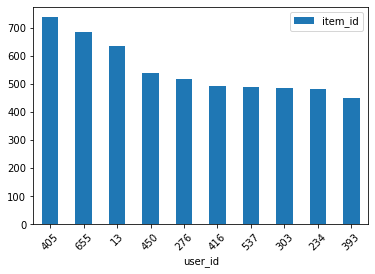

In [246]:
count_by_user = df.groupby(['user_id']).count().sort_values('item_id', ascending = False)
count_by_user.reset_index(level=0, inplace=True)
ax = count_by_user.iloc[:10].plot.bar(x='user_id', y='item_id', rot=45)

User with id '849' on average gives the higher ratings, while user '181' gives the lowest ratings

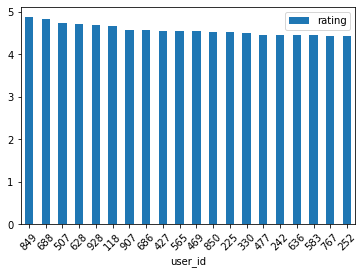

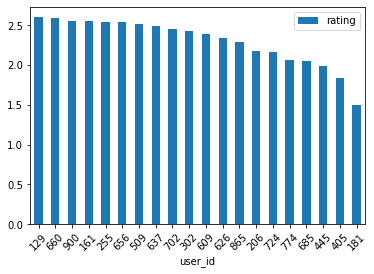

In [247]:
rating_by_user = df.groupby(['user_id']).mean().sort_values('rating', ascending = False)
rating_by_user.reset_index(level=0, inplace=True)
ax = rating_by_user.iloc[:20].plot.bar(x='user_id', y='rating', rot=45)
ax2 = rating_by_user.iloc[len(rating_by_user)-20:].plot.bar(x='user_id', y='rating', rot=45)

Then movie information was loaded, and combined with main data using itme_id as a key to see movie titles have got the higest ratings, and were rated more than others

In [248]:
genre = pd.DataFrame(pd.read_csv('ml-100k/u.genre', sep='|', encoding='latin-1', header = None))

item_cols = ['item_id','title','release date','video release date','IMDb URL']+list(genre[0])
items = pd.DataFrame(pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', header = None, names=item_cols))
items.head()

,item_id,title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [521]:
pd.concat([joined.iloc[:,2], joined.iloc[:,8:]], axis=1).head()

,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
4,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [250]:
joined = pd.concat([df.set_index('item_id'), items.set_index('item_id')], 
    axis=1, join="inner")
joined.reset_index(level=0, inplace=True)
joined.head()

,item_id,user_id,rating,timestamp,title,release date,video release date,IMDb URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,242,196,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,302,186,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,377,22,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,51,244,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,346,166,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0


As it can be seen below, 'Star Wars' movie was rated more than other movies, followed by 'Contact', and 'Fargo'

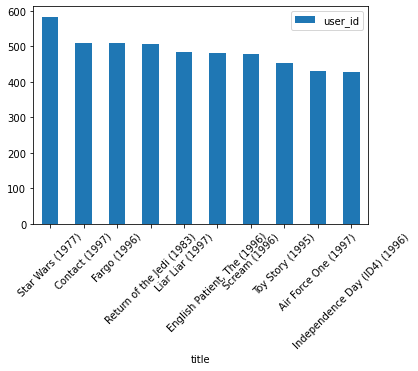

In [251]:
count_by_item = joined.groupby(['title']).count().sort_values('user_id', ascending = False)
count_by_item.reset_index(level=0, inplace=True)
ax = count_by_item.iloc[:10].plot.bar(x='title', y='user_id', rot=45)

All the movies in the first bar chart have gotten high ratings, and all the movies in the second chart have gotten the lowest

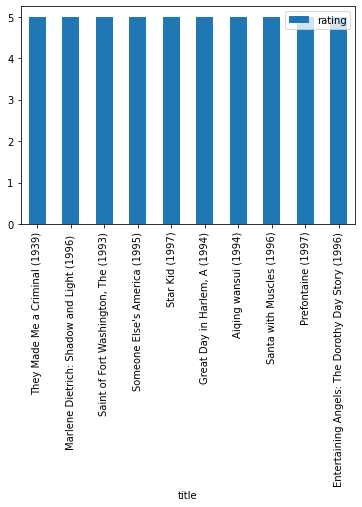

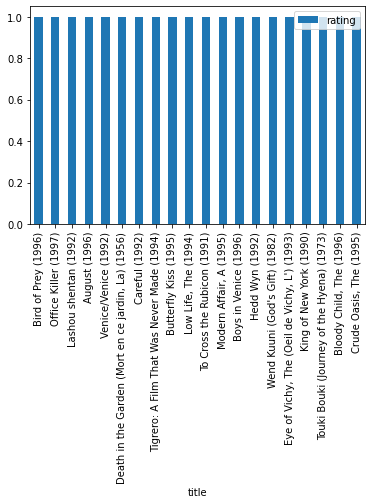

In [252]:
rating_by_item = joined.groupby(['title']).mean().sort_values('rating', ascending = False)
rating_by_item.reset_index(level=0, inplace=True)
ax = rating_by_item.iloc[:10].plot.bar(x='title', y='rating', rot=90)
ax2 = rating_by_item.iloc[len(rating_by_item)-20:].plot.bar(x='title', y='rating', rot=90)

To be able to extract data by genres, previously data was melted, and it can be seen the 'Film-Noir' overall had higher ratings

In [253]:
melted = pd.concat([joined.iloc[:,2], joined.iloc[:,8:]], axis=1).melt('rating').dropna()
melted = melted[melted['value']==True]
rating_by_genre = melted.groupby(['variable']).mean().sort_values('rating', ascending = False)
rating_by_genre.reset_index(level=0, inplace=True)
rating_by_genre

,variable,rating,value
0,Film-Noir,3.921523,1.0
1,War,3.815812,1.0
2,Drama,3.687379,1.0
3,Documentary,3.672823,1.0
4,Mystery,3.638132,1.0
5,Crime,3.632278,1.0
6,Romance,3.621705,1.0
7,Western,3.613269,1.0
8,Animation,3.576699,1.0
9,Sci-Fi,3.560723,1.0


Then user data was loaded to get their ages, and they were categorized into four age-groups

In [255]:
user_cols = ['user_id','age','gender','occupation','zip_code']
users = pd.DataFrame(pd.read_csv('ml-100k/u.user', sep='|', encoding='latin-1', header = None, names=user_cols))
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [256]:
users.loc[users['age']<=18, 'age_group'] = 'teenage'
users.loc[users['age'].between(19,27), 'age_group'] = 'youth'
users.loc[users['age'].between(28,60), 'age_group'] = 'adult'
users.loc[users['age']>60, 'age_group'] = 'older_adult'
users.head()

,user_id,age,gender,occupation,zip_code,age_group
0,1,24,M,technician,85711,youth
1,2,53,F,other,94043,adult
2,3,23,M,writer,32067,youth
3,4,24,M,technician,43537,youth
4,5,33,F,other,15213,adult


In [257]:
joined2 = pd.concat([joined.set_index('user_id'), users.set_index('user_id')], 
    axis=1, join="inner")
joined2.reset_index(level=0, inplace=True)
joined2.head()

,user_id,item_id,rating,timestamp,title,release date,video release date,IMDb URL,unknown,Action,...,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code,age_group
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,49,M,writer,55105,adult
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,0,1,0,0,39,F,executive,00000,adult
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,25,M,writer,40206,youth
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,1,0,0,1,1,28,M,technician,80525,adult
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,47,M,educator,55113,adult


In [258]:
melted2 = pd.concat([joined2.iloc[:,2], joined2.iloc[:,8:28], joined2.iloc[:,31]], axis=1).melt(('rating', 'age_group')).dropna()
melted2 = melted2[melted2['value']==True]
melted2.head()

,rating,age_group,variable,value
2172,5,youth,unknown,1
3781,4,adult,unknown,1
7245,3,youth,unknown,1
8567,1,youth,unknown,1
12475,3,adult,unknown,1


From the bar charts below, it can be noticed that teenagers prefer 'War' movies, while other groups prefer 'Film-Noir'.

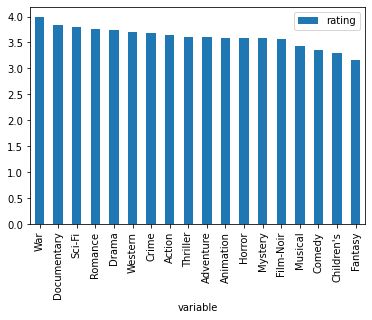

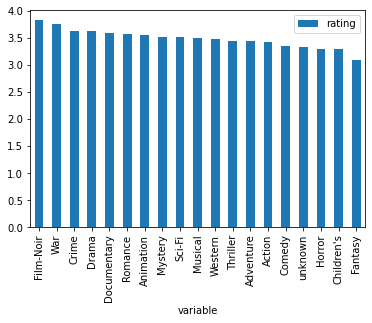

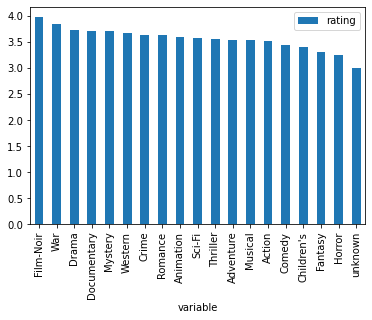

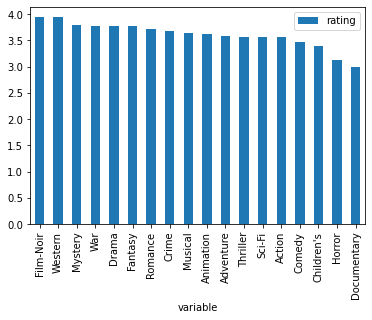

In [259]:
rating_by_genre_age_group = melted2.groupby(['age_group','variable']).mean().sort_values('rating', ascending = False)
rating_by_genre_age_group.reset_index(level=[0,1], inplace=True)
rating_by_genre_age_group
ax1 = rating_by_genre_age_group[rating_by_genre_age_group['age_group']=='teenage'].plot.bar(x='variable', y='rating', rot=90)
ax2 = rating_by_genre_age_group[rating_by_genre_age_group['age_group']=='youth'].plot.bar(x='variable', y='rating', rot=90)
ax3 = rating_by_genre_age_group[rating_by_genre_age_group['age_group']=='adult'].plot.bar(x='variable', y='rating', rot=90)
a4 = rating_by_genre_age_group[rating_by_genre_age_group['age_group']=='older_adult'].plot.bar(x='variable', y='rating', rot=90)



### Exercise 2: Implementing basic matrix factorization (MF) technique for recommender systems
First we need to transform the data into user-item matrix, and pandas pivot table was used for this purpose

In [492]:
df_mf = pd.pivot_table(df, values='rating', index=['user_id'], columns=['item_id'])
df_mf.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next step is data preprocessing and normalization, also separate data into train/validation/test sets according to the 0.8/0.1/0.1 ratio.\
\
To normalize the data, all the values in the column were divided by them largest value in a column.
Next, the train test split slightly differs for Matrix Factorization than for other machine laerning models, because we cannot train the data on one group of users, and than test them on other group of users. That's why, first I extracted all possible user-item combinations as a list of tuples, then randomly divided the data into train/test/validation sets. Also, we should check if all the reviews for one movies didn't go to test or validation sets, otherwise put them back to the train set. Then, according to the selected user, item combinations data in the main matrix is removed, and value is stored in dictionaries of test/valid sets.\
\
And finally to get rid of any issues during training, all NA values are replaced by the mean values of corresponding column.

In [501]:
import collections
df_mf_norm = df_mf/df_mf.max()
records = df[['user_id','item_id']].to_records(index=False)
tuples = list(records)
test_size = val_size = int(len(tuples)*0.1)

#Method for checking if item reviews were faily distributed
def clean_tuples(tuples, df):
    new_tuples = []
    unique_tuple_cols = collections.Counter([i for u, i in tuples])
    for t in tuples:
        #if not np.isnan(df_mf[t[1]].std()):
        u,i = t
        if np.sum(df[i].count()) > unique_tuple_cols[i]+1:
            new_tuples.append(t)
    return new_tuples

random.shuffle(tuples)
test_tuples, val_tuples = tuples[:test_size], tuples[test_size:test_size+val_size]
test_tuples, val_tuples = clean_tuples(test_tuples, df_mf_norm), clean_tuples(val_tuples, df_mf_norm)

def upd_train_data(df, tuples):
    data = {}
    for u,i in tuples:
        data[(u,i)] = df.iloc[u-1][i]
        df.iloc[u-1][i] = np.nan
    return data

test_data, val_data = upd_train_data(df_mf_norm, test_tuples), upd_train_data(df_mf_norm, val_tuples)
df_mf_norm = df_mf_norm.fillna(df_mf_norm.mean())

mean, std = np.mean(df_mf_norm.mean()), np.mean(df_mf_norm.std())
df_mf_norm.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.600000,0.800000,0.726627,0.600000,0.75,0.800000,0.20000,0.782203,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.800000,0.626263,0.610811,0.726627,0.660606,0.75,0.765584,0.78895,0.782203,0.400000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.773563,0.626263,0.610811,0.726627,0.660606,0.75,0.765584,0.78895,0.782203,0.760563,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.773563,0.626263,0.610811,0.726627,0.660606,0.75,0.765584,0.78895,0.782203,0.760563,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.800000,0.600000,0.610811,0.726627,0.660606,0.75,0.765584,0.78895,0.782203,0.760563,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


The function for calculating the loss

In [413]:
from numpy import linalg as LA
from scipy.special import logsumexp
def calculate_loss(df, P, Q, lambd):
    na_ratings = df.to_numpy()
    n_users, n_items = na_ratings.shape
    loss = 0
    for u in range(n_users):
        for i in range(n_items):
            loss = loss + ((na_ratings[u,i] - np.dot(P[u],Q[i]))**2)
    return (loss+lambd*(LA.norm(P)**2+LA.norm(Q)**2))/(n_users*n_items)

The function for calculating RMSE of test or validation sets

In [414]:
def calcRMSE(test, P, Q):
    rmse = 0
    for k in test.keys():
        u, i = k
        rmse = rmse + (test[k]-np.dot(P[u-1],Q[i-1])**2)
    return np.power(rmse/len(test), 1/2)

The method for traing the data. For this method, algorithm from page 29 was used where in updates the value for user and item latent vectors at each iteration accoring to given alpha, lambda, and K values. If loss is converged, or maximum number of iteration reached, the method returns latest RMSE value on validation data, and latest latent vectors

In [507]:
def SGD_MF(df, alpha, lambd, K, MAX_ITER):
    ratings = df_mf_norm.to_numpy()
    n_users, n_items = ratings.shape
    P = np.random.normal(mean, std, size=(n_users, K))
    Q = np.random.normal(mean, std, size=(n_items, K))
    loss = calculate_loss(df_mf_no_na, P, Q, lambd)
    for x in range(MAX_ITER):
        for u in range(n_users):
            for i in range(n_items):
                if np.isnan(ratings[u,i]): continue
                e = ratings[u,i] - np.dot(P[u],Q[i])
                for k in range(K):
                    P[u,k] = P[u,k] + alpha*(e*Q[i,k] - lambd*P[u,k])
                    Q[i,k] = Q[i,k] + alpha*(e*P[u,k] - lambd*Q[i,k])
        prev_loss = loss
        loss = calculate_loss(df_mf_no_na, P, Q, lambd)
        rmse = calcRMSE(val_data, P, Q)
        print('Loss:', loss, 'RMSE', rmse)
        if prev_loss-loss<0.00001:break
    return P, Q, rmse        

Next step is hyperparameter selection. for this purpose the space of possibble hyperparameter combinations were created, then then 10 of them were randomly selected to avoid long training. For each selection it compares latest rmse scores, and identifies the best parameter combinations

In [510]:
alphas = [0.1, 0.01, 0.001]
lambdas = [1, 0.1, 0.01]
n_components = [2, 3, 5, 7]
space = []
for a in alphas:
    for l in lambdas:
        for k in n_components:
            space.append((a,l,k))
params = random.sample(range(0, len(space)), 10)

best_P, best_Q, best_rmse, best_params = None, None, float('inf'), None
for p in params:
    alpha, lambd, K = space[p]
    P, Q, rmse = SGD_MF(df_mf_norm, alpha, lambd, K, 10)
    print('For alpha, lambda, k', alpha, lambd, K, 'validation rmse equals: ', rmse)
    if rmse<best_rmse:
        best_P, best_Q, best_rmse, best_params = P, Q, rmse, space[p]

Loss: 0.01207397073848376 RMSE 0.5899231809774359
Loss: 0.007274600991205038 RMSE 0.5332954111165644
Loss: 0.007235751525670833 RMSE 0.5342201327666339
Loss: 0.007245183644728951 RMSE 0.5344169019745091
For alpha, lambda, k 0.01 0.1 2 validation accuracy equals:  0.5344169019745091
Loss: 0.02172954611929212 RMSE 0.6219926291475537
Loss: 0.01741080908716108 RMSE 0.6200877744112013
Loss: 0.014242261618534697 RMSE 0.5999104227090482
Loss: 0.012880429295652574 RMSE 0.5855875427032199
Loss: 0.01241312794749293 RMSE 0.5774078530108743
Loss: 0.012296894624814165 RMSE 0.5732325318510275
Loss: 0.012306684393540561 RMSE 0.5713457233800073
For alpha, lambda, k 0.001 0.1 3 validation accuracy equals:  0.5713457233800073
Loss: 0.5216967313846774 RMSE 0.8439395439615679
Loss: 0.521944945829952 RMSE 0.8439682296142523
For alpha, lambda, k 0.1 1 7 validation accuracy equals:  0.8439682296142523
Loss: 0.5065097144720294 RMSE 0.8428019595480197
Loss: 0.5219227609498839 RMSE 0.8439682273926497
For alpha,

According to the results of random hyperparameter selection, the best hyperparameter are shown below. Data is once again trained according to the best selected parameters, and then rmse is calculated on test data as shown below:

In [511]:
print('Best parameters: ', best_params, 'rmse score: ', best_rmse)

alpha, lambd, K = best_params
P, Q, rmse = SGD_MF(df_mf_norm, alpha, lambd, K, 10)
test_rmse = calcRMSE(test_data, P, Q)
print('Test rmse score: ', test_rmse)

Best parameters:  (0.01, 0.01, 5) rmse score:  0.45587993642688807
Loss: 0.10522635711359603 RMSE 0.7656650555358822
Loss: 0.03060761905371011 RMSE 0.6197218315282981
Loss: 0.01563449610296858 RMSE 0.4864271279084053
Loss: 0.00962476739310932 RMSE 0.2123502667747177
Loss: 0.004987097009702313 RMSE 0.4330692535092501
Loss: 0.004208357875275532 RMSE 0.479899922697761
Loss: 0.004082383824415771 RMSE 0.45539390547365105
Loss: 0.003944551006194225 RMSE 0.44040415421714557
Loss: 0.003929610332432303 RMSE 0.4545944510123294
Loss: 0.0039347510399980554 RMSE 0.4558832512995181
Test rmse score:  0.4501957420908254


### Exercise 3: Recommender Systems using matrix factorization sckitlearn
This exercise is similar to the previous one, with the same algorithm for hyperparameter selection. However, instead on manually implemented SGD model, sklearn model for Matrix Factorization 'non_negative_factorization' was used for finding latent vectors, which works considerably faster than manual implementation

In [518]:
from sklearn.decomposition import non_negative_factorization
params = random.sample(range(0, len(space)), 10)

best_P, best_Q, best_rmse, best_params = None, None, float('inf'), None
for p in params:
    alpha, lambd, K = space[p]
    P, Q, n_iter = non_negative_factorization(X=ratings,n_components=K, init='random', random_state=0, alpha=alpha,l1_ratio=1)
    #P = model.fit_transform(ratings)
    #Q = model.components_
    rmse = calcRMSE(val_data, P, Q.T)
    print('For alpha, lambda, k', alpha, lambd, K, 'validation rmse equals: ', rmse)
    if rmse<best_rmse:
        best_P, best_Q, best_rmse, best_params = P, Q, rmse, space[p]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


For alpha, lambda, k 0.1 1 5 validation rmse equals:  0.44507092094731543


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


For alpha, lambda, k 0.001 0.01 7 validation rmse equals:  0.44439630994424845


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


For alpha, lambda, k 0.01 1 7 validation rmse equals:  0.44439630994424845


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


For alpha, lambda, k 0.001 0.1 3 validation rmse equals:  0.445829530999739


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


For alpha, lambda, k 0.1 0.01 5 validation rmse equals:  0.44507092094731543


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


For alpha, lambda, k 0.1 1 7 validation rmse equals:  0.44439630994424845


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


For alpha, lambda, k 0.1 0.1 5 validation rmse equals:  0.44507092094731543


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


For alpha, lambda, k 0.1 0.01 3 validation rmse equals:  0.445829530999739


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


For alpha, lambda, k 0.001 1 7 validation rmse equals:  0.44439630994424845
For alpha, lambda, k 0.001 1 3 validation rmse equals:  0.445829530999739


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Results of the sklearn Matrix Factorization model, and the best model parameters.
Also, the RMSE on the test data based on the most efficient hyperparameters:

In [520]:
print('Best parameters: ', best_params, 'rmse score: ', best_rmse)

alpha, lambd, K = best_params
P, Q, n_iter = non_negative_factorization(X=ratings,n_components=K, init='random', random_state=0, alpha=alpha,l1_ratio=1)
test_rmse = calcRMSE(test_data, P, Q.T)
print('Test rmse score: ', test_rmse)

Best parameters:  (0.001, 0.01, 7) rmse score:  0.44439630994424845
Test rmse score:  0.4391616809752976


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
